<a href="https://colab.research.google.com/github/avis176/Flight-Crash-Severity-Prediction/blob/master/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import io
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
pd.set_option("display.max_columns",None)
plt.style.use("ggplot")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded=files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


Importing data

In [ ]:
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [ ]:
print(train_df.shape)
print(test_df.shape)

(54808, 14)
(23490, 13)


 **Exploring train dataset:**

In [ ]:
# Check for the duplicate values:
duplicate = train_df[train_df.duplicated('employee_id')] 
duplicate

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [ ]:
#Check the no. of observation in train data:
train_df.shape


(54808, 14)

In [ ]:
#Check the columns:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
#Check the datatypes:
train_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [ ]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#Check for missing values:
train_df.isnull().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

 'Education' and 'previous year rating' feature  has missing values 4% & 8%

In [ ]:
#No.of unique values in each column:
train_df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64



1.   Ordinal Variable : education,previous year rating
2.   Nominal : department,region,recruitment channel,no.of trainings
3.   Binary variable : gender,awards won,KPI_met






In [ ]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
# Check the target feature:
train_df['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

#**Univariate Analysis :**

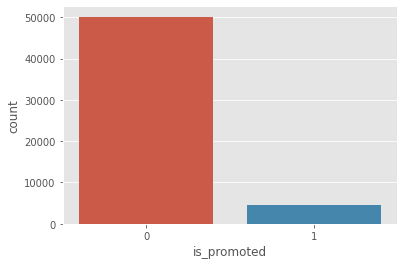

In [ ]:
sns.countplot(train_df['is_promoted'])

After seeing the diagram and counts it come to understand that data is imblanced only 9 % from the  total emloyees are geting promoted and 91% are not.

In [ ]:
# Make variables that contain all categorical variable:
categorical = [col for col in train_df.columns if train_df[col].dtypes == 'object']
cat_df = train_df[categorical]
cat_df.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


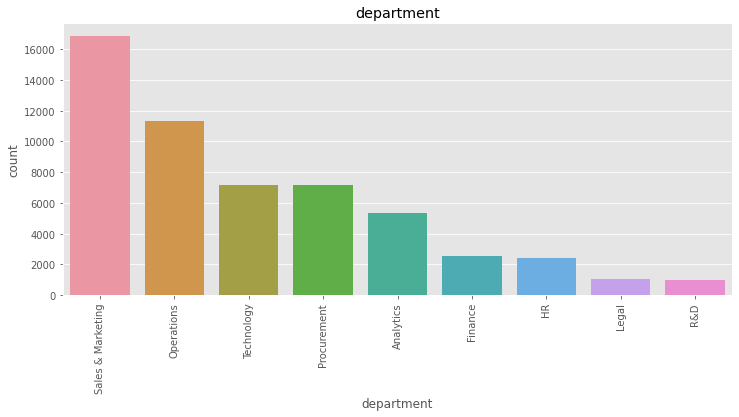

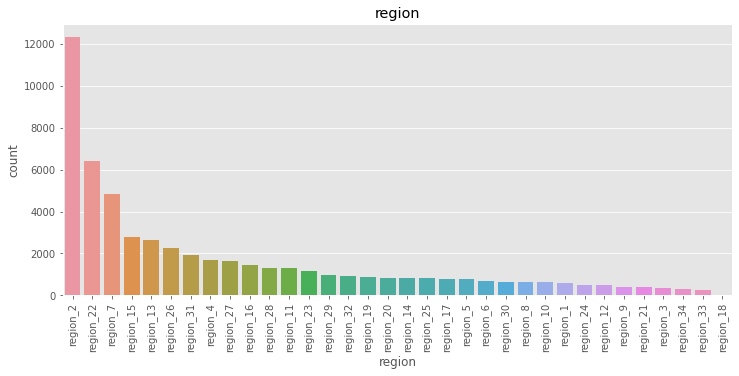

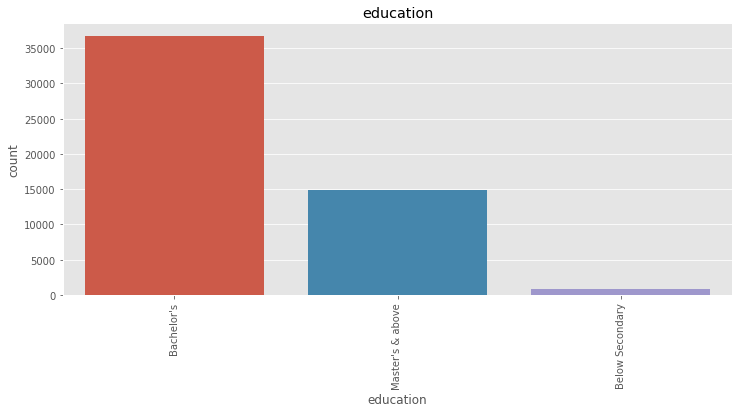

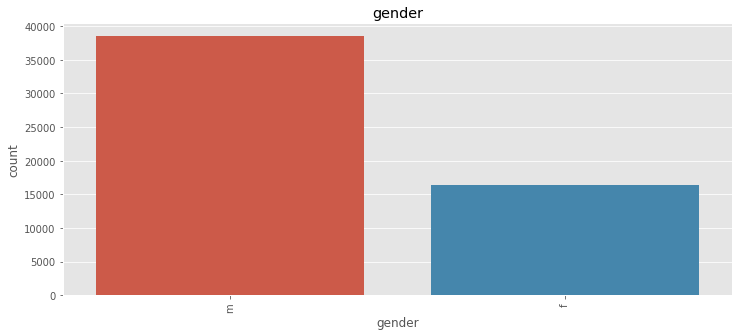

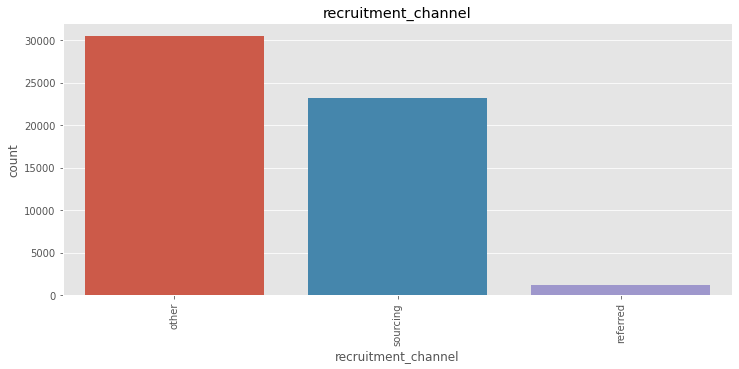

In [ ]:
for feature in cat_df:
  plt.figure(figsize = (12,5))
  sns.countplot(cat_df[feature],order=cat_df[feature].value_counts().index)
  plt.title(feature)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
train_df['department'].value_counts(normalize=True)

Sales & Marketing    0.307254
Operations           0.207050
Technology           0.130236
Procurement          0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: department, dtype: float64



*  Only 2% of employees are those who are recruited through referrals
*  70 % of the employees are male
*  70% of employees are holding a bachelor degree,28% employees hold the Master degree
*  44% of employees are from the region 2,22,7
*  65 % of the employees are from the sales,operation and procurement department








In [ ]:
#Create variable that contains all variables that are numerical data types for subdivided into discrete and continuous numerical variables:
numerical = [col for col in train_df.columns if train_df[col].dtypes != 'object']
num_df = train_df[numerical]
num_df.drop(['employee_id','is_promoted',],axis=1,inplace=True)
num_df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1,35,5.0,8,1,0,49
1,1,30,5.0,4,0,0,60
2,1,34,3.0,7,0,0,50
3,2,39,1.0,10,0,0,50
4,1,45,3.0,2,0,0,73


In [ ]:
# Created discrete variables:
discrete = [feature for feature in num_df if len(num_df[feature].unique()) <= 10]
discrete
disc_df = train_df[discrete]

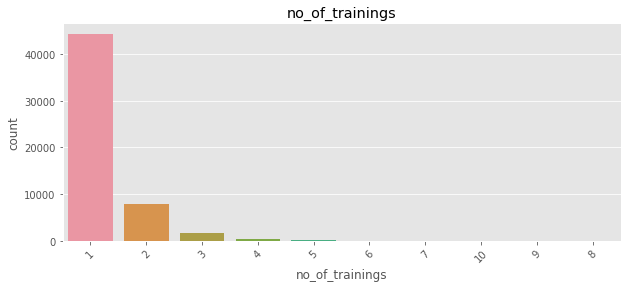

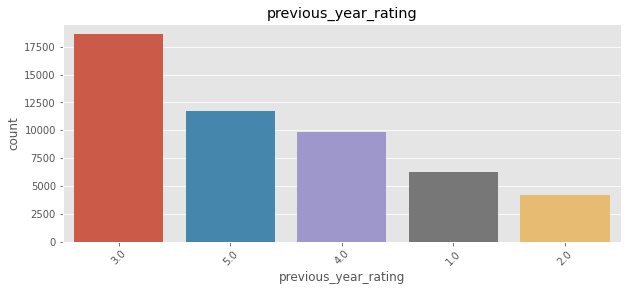

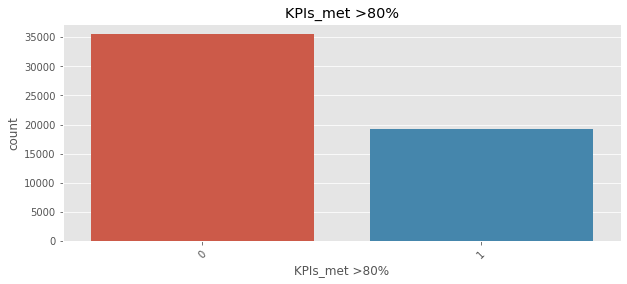

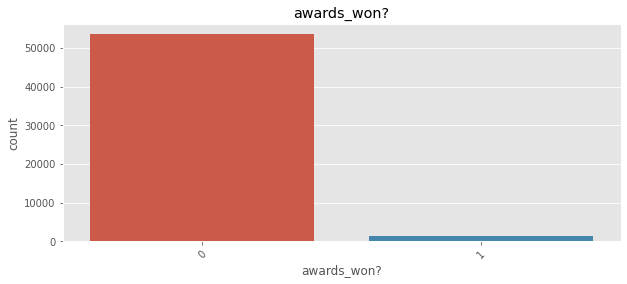

In [ ]:
for feature in disc_df:
  plt.figure(figsize=(10,4))
  sns.countplot(disc_df[feature],order=disc_df[feature].value_counts().index)
  plt.title(feature)
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
train_df['previous_year_rating'].value_counts(normalize=True)

3.0    0.367335
5.0    0.231651
4.0    0.194874
1.0    0.122780
2.0    0.083360
Name: previous_year_rating, dtype: float64



*  Most of the employees does not won award in previous year neither had their 
KPT_met > 80%
*  81% employees complete only 1 training in previous years
*  60% of the employees have rating in previous year of 3 and 5






In [ ]:
# Created numerical variables:
num_df.drop(['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?'],axis=1,inplace=True)
num_df.head()

,age,length_of_service,avg_training_score
0,35,8,49
1,30,4,60
2,34,7,50
3,39,10,50
4,45,2,73


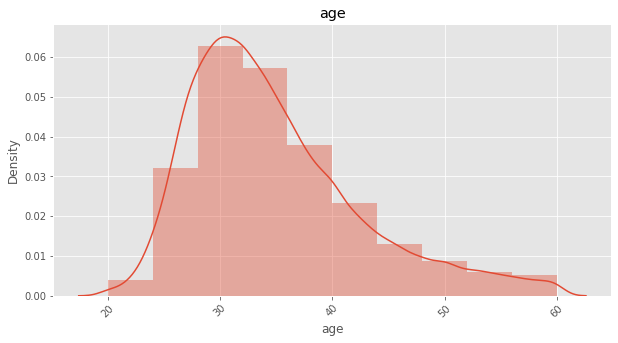

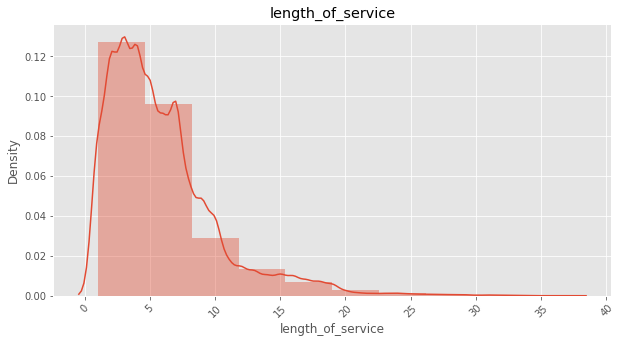

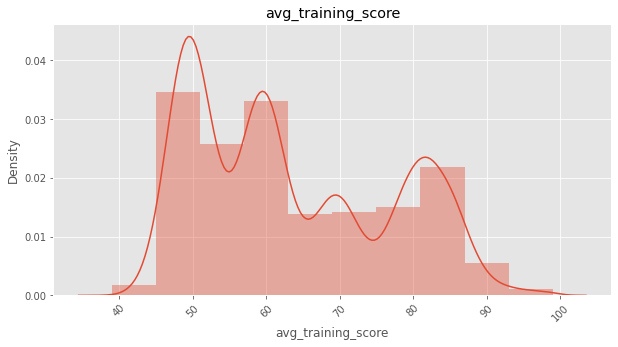

In [ ]:
for feature in num_df:
  plt.figure(figsize=(10,5))
  sns.distplot(num_df[feature],kde=True,bins=10)
  plt.title(feature)
  plt.xticks(rotation=45)
  plt.show()

#**Bivariate Analysis**

In [ ]:
#train_df.groupby(['is_promoted'])['gender'].mean()
#train_df.groupby(['is_promoted', 'gender'])['gender'].count().unstack()
#pd.crosstab(train_df.is_promoted, train_df.gender,normalize='columns')

In [ ]:
pd.crosstab(train_df.gender, train_df.is_promoted,normalize='index')

is_promoted,0,1
gender,,
f,0.910066,0.089934
m,0.916849,0.083151


Text(0.5, 1.0, 'Gender vs Promotion')

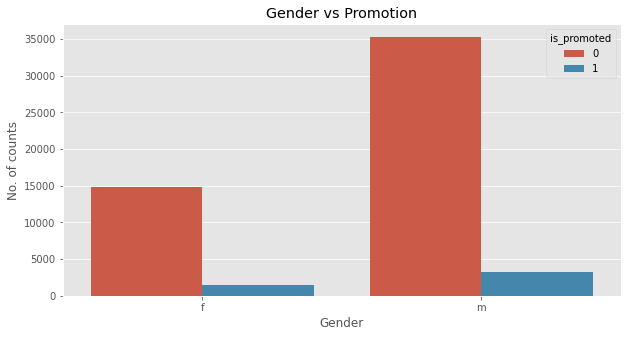

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',hue='is_promoted',data=train_df)
plt.xlabel("Gender")
plt.ylabel("No. of counts")
plt.title("Gender vs Promotion")

As the plot shows,there is no partiality between males and females in terms of promotion

In [ ]:
cat_df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [ ]:
pd.crosstab(train_df.department, train_df.is_promoted,normalize='index')

is_promoted,0,1
department,,
Analytics,0.904335,0.095665
Finance,0.918770,0.081230
HR,0.943755,0.056245
Legal,0.948989,0.051011
Operations,0.909852,0.090148
Procurement,0.903614,0.096386
R&D,0.930931,0.069069
Sales & Marketing,0.927969,0.072031
Technology,0.892407,0.107593


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

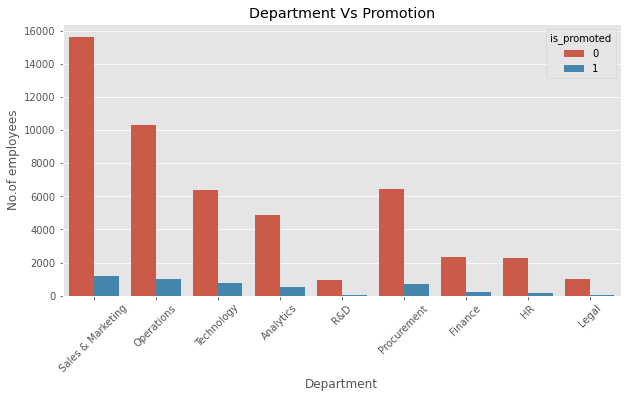

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='department',hue='is_promoted',data=train_df)
plt.xlabel('Department')
plt.ylabel("No.of employees")
plt.title("Department Vs Promotion")
plt.xticks(rotation=45)

All departments have the equal no. of promotion.

In [ ]:
pd.crosstab(train_df.region,train_df.is_promoted,normalize='index')

is_promoted,0,1
region,,
region_1,0.904918,0.095082
region_10,0.921296,0.078704
region_11,0.943726,0.056274
region_12,0.934000,0.066000
region_13,0.913142,0.086858
region_14,0.925030,0.074970
region_15,0.920940,0.079060
region_16,0.930375,0.069625
region_17,0.863065,0.136935


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

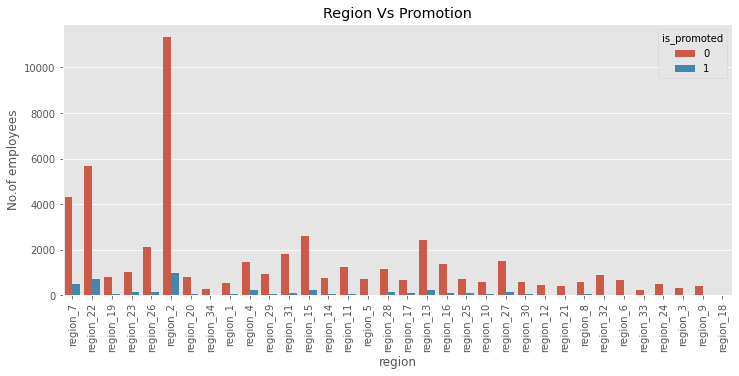

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='region',hue='is_promoted',data=train_df)
plt.xlabel('region')
plt.ylabel("No.of employees")
plt.title("Region Vs Promotion")
plt.xticks(rotation=90)

As the plot shows,there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.

In [ ]:
pd.crosstab(train_df.education,train_df.is_promoted,normalize='index')

is_promoted,0,1
education,,
Bachelor's,0.917969,0.082031
Below Secondary,0.916770,0.083230
Master's & above,0.901441,0.098559


Text(0.5, 1.0, 'Education vs Promotion')

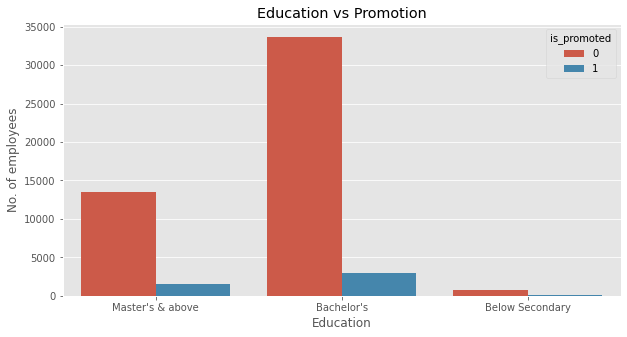

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='is_promoted',data=train_df)
plt.xlabel("Education")
plt.ylabel("No. of employees")
plt.title("Education vs Promotion")

As the plot shows, there is no biasedness over education in terms of Promotion.
Share of promotion is almost equal.

In [ ]:
pd.crosstab(train_df.recruitment_channel,train_df.is_promoted,normalize='index')

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013


Text(0.5, 1.0, 'Recruitment Channel vs Promotion')

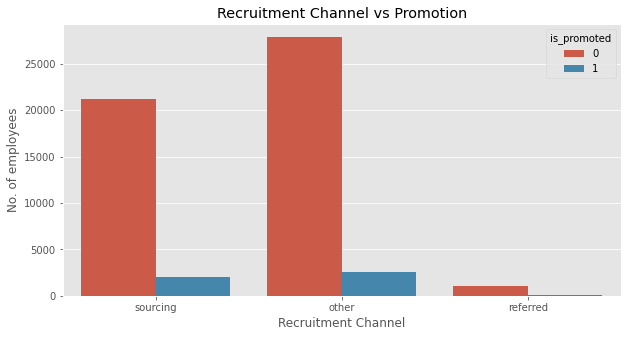

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='recruitment_channel',hue='is_promoted',data=train_df)
plt.xlabel("Recruitment Channel")
plt.ylabel("No. of employees")
plt.title("Recruitment Channel vs Promotion")

As the plot shows, there is no biasedness over recruitment channel in terms of Promotion. Share of promotion is almost equal.



In [ ]:
disc_df.columns

Index(['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?'],
      dtype='object')

In [ ]:
pd.crosstab(train_df.no_of_trainings,train_df.is_promoted,normalize='index')

is_promoted,0,1
no_of_trainings,,
1,0.911893,0.088107
2,0.924252,0.075748
3,0.931306,0.068694
4,0.944444,0.055556
5,0.976562,0.023438
6,0.954545,0.045455
7,1.000000,0.000000
8,1.000000,0.000000
9,1.000000,0.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

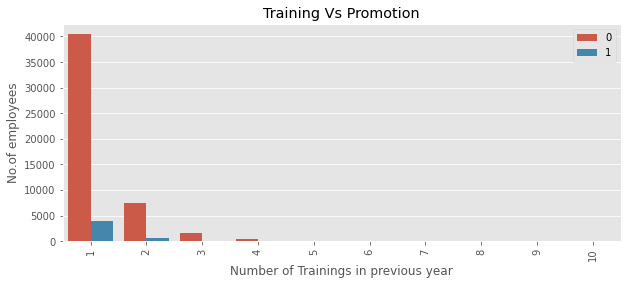

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='no_of_trainings',hue='is_promoted',data=train_df)
plt.xlabel('Number of Trainings in previous year')
plt.ylabel("No.of employees")
plt.title("Training Vs Promotion")
plt.legend(loc='upper right')
plt.xticks(rotation=90)

 As plot shows,no_of_trainings alone can not much important as it should be.

In [ ]:
pd.crosstab(train_df.previous_year_rating,train_df.is_promoted,normalize='index')

is_promoted,0,1
previous_year_rating,,
1.0,0.985859,0.014141
2.0,0.957160,0.042840
3.0,0.927221,0.072779
4.0,0.920624,0.079376
5.0,0.836385,0.163615


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

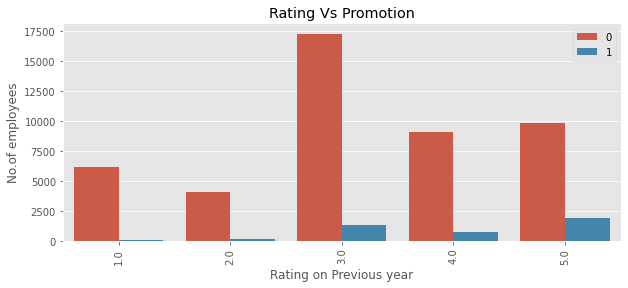

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='previous_year_rating',hue='is_promoted',data=train_df)
plt.xlabel('Rating on Previous year')
plt.ylabel("No.of employees")
plt.title("Rating Vs Promotion")
plt.legend(loc='upper right')
plt.xticks(rotation=90)

As above graph,clearly suggests that previous year ratings matter a lot, if the ratings are high, the chances of being promoted in the company increases.

In [ ]:
pd.crosstab(train_df['KPIs_met >80%'],train_df['is_promoted'],normalize='index')

is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094


Text(0.5, 1.0, 'KPI vs Promotion')

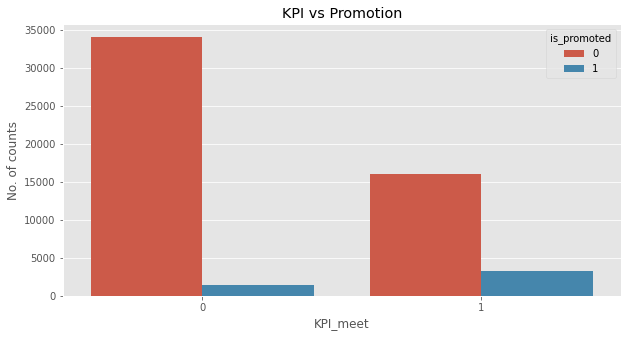

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='KPIs_met >80%',hue='is_promoted',data=train_df)
plt.xlabel("KPI_meet")
plt.ylabel("No. of counts")
plt.title("KPI vs Promotion")

As plot shows,having a good KPI score increases the chances of getting promoted in the company

In [ ]:
pd.crosstab(train_df['awards_won?'],train_df['is_promoted'],normalize='index')

is_promoted,0,1
awards_won?,,
0,0.923251,0.076749
1,0.559843,0.440157


Text(0.5, 1.0, 'Award vs Promotion')

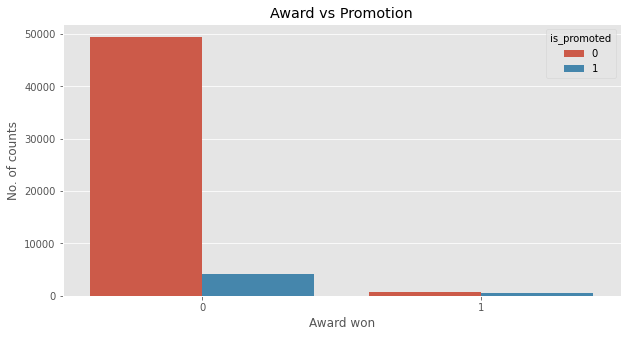

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='awards_won?',hue='is_promoted',data=train_df)
plt.xlabel("Award won")
plt.ylabel("No. of counts")
plt.title("Award vs Promotion")

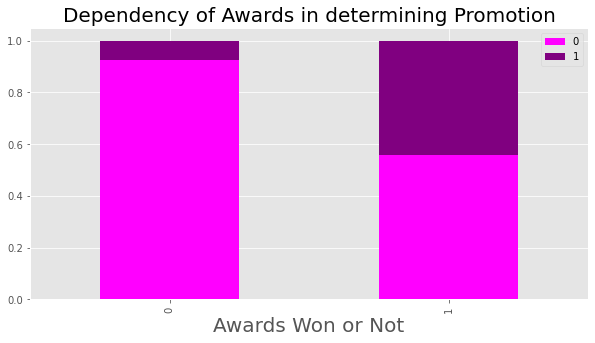

In [ ]:
data = pd.crosstab(train_df['awards_won?'], train_df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,5), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 20)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

As plot shws,There is a very good chance of getting promoted if the employee has won an award



In [ ]:
num_df.columns

Index(['age', 'length_of_service', 'avg_training_score'], dtype='object')

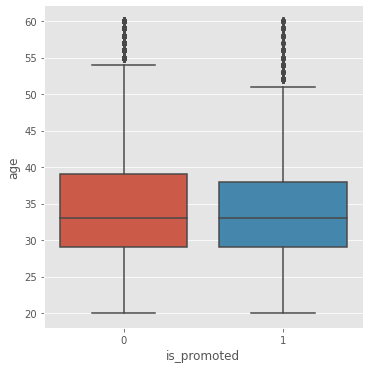

In [ ]:
sns.catplot(y='age',x='is_promoted',data=train_df,kind='box')

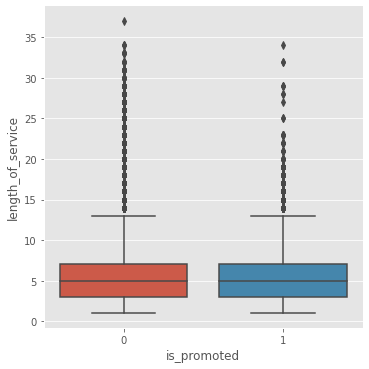

In [ ]:
sns.catplot(y='length_of_service',x='is_promoted',data=train_df,kind='box')

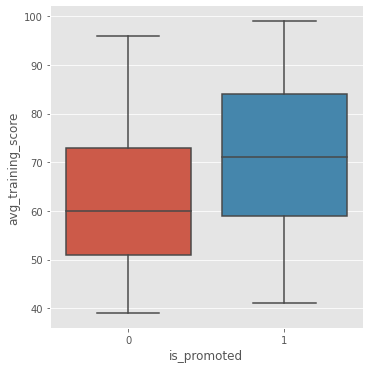

In [ ]:
sns.catplot(y='avg_training_score',x='is_promoted',data=train_df,kind='box')

As, the Training Scores Increases, the chances of Promotion Increases Highly

#Feature Engineering:

In [ ]:
train_df[train_df['previous_year_rating'].isnull()][['department','education','previous_year_rating','length_of_service']]

,department,education,previous_year_rating,length_of_service
10,Technology,NaN,NaN,1
23,Procurement,Bachelor's,NaN,1
29,Sales & Marketing,Bachelor's,NaN,1
56,Sales & Marketing,Bachelor's,NaN,1
58,Sales & Marketing,Bachelor's,NaN,1
...,...,...,...,...
54703,R&D,Bachelor's,NaN,1
54734,Operations,Bachelor's,NaN,1
54746,Finance,Bachelor's,NaN,1
54773,Finance,Bachelor's,NaN,1


In [ ]:
train_df[train_df['previous_year_rating'].isnull()]['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

In [ ]:
train_df[train_df['length_of_service']==1]['previous_year_rating'].median()

3.0

**Handling Missing values in train and test**:

In [ ]:
train_df['education'].fillna('Missing',inplace=True)
#train_df['education'].fillna(train_df['education'].mode()[0],inplace=True)
# Create extra feature for missing variable:
train_df['rating_null'] = np.where(train_df['previous_year_rating'].isnull(),1,0)

In [ ]:
train_df['previous_year_rating'].fillna(3.0,inplace=True)

In [ ]:
test_df['education'].fillna('Missing',inplace=True)
#test_df['education'].fillna(test_df['education'].mode()[0],inplace=True)
test_df['rating_null'] = np.where(test_df['previous_year_rating'].isnull(),1,0)

In [ ]:
test_df['previous_year_rating'].fillna(3.0,inplace=True)

 **Encoding ordinal variable in train and test set**:

In [ ]:
#edu = {"Below Secondary":0,"Bachelor's":1,"Master's & above":2}
#train_df['education']=train_df['education'].map(edu)

In [ ]:
#test_df['education']=test_df['education'].map(edu)

**Binning Age variable**

In [ ]:
#train_df['age_bin']= pd.cut(x=train_df['age'],bins=[20,29,39,49],labels=['20','30','40'])
#test_df['age_bin']= pd.cut(x=test_df['age'],bins=[20,29,39,49],labels=['20','30','40'])

In [ ]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,rating_null
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


**Make new dataset combining train and test data**:

In [ ]:

train_df["train_test"] = "train"
test_df['train_test'] = "test"
test_df["is_promoted"] = np.NaN
all_data = pd.concat([train_df,test_df])

In [ ]:
all_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,rating_null,train_test
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,0,train


In [ ]:
all_data.shape

(78298, 16)

In [ ]:
all_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'rating_null', 'train_test'],
      dtype='object')

In [ ]:
cat_new = all_data[['department','region','gender','recruitment_channel','education']]

In [ ]:
cat_new

,department,region,gender,recruitment_channel,education
0,Sales & Marketing,region_7,f,sourcing,Master's & above
1,Operations,region_22,m,other,Bachelor's
2,Sales & Marketing,region_19,m,sourcing,Bachelor's
3,Sales & Marketing,region_23,m,other,Bachelor's
4,Technology,region_26,m,other,Bachelor's
...,...,...,...,...,...
23485,Legal,region_2,m,sourcing,Below Secondary
23486,Technology,region_25,m,sourcing,Bachelor's
23487,HR,region_16,f,sourcing,Bachelor's
23488,Procurement,region_31,m,sourcing,Bachelor's


**Dummy encoding for categorical variables:**

In [ ]:
#Dummy encoding for categorical data:
data_encoded = pd.get_dummies(all_data,columns = ['department','region','gender','recruitment_channel','education'],drop_first =True)

In [ ]:
data_encoded.shape

(78298, 58)

In [ ]:
data_encoded.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,rating_null,train_test,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,education_Below Secondary,education_Master's & above,education_Missing
0,65438,1,35,5.0,8,1,0,49,0.0,0,train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,65141,1,30,5.0,4,0,0,60,0.0,0,train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7513,1,34,3.0,7,0,0,50,0.0,0,train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,2542,2,39,1.0,10,0,0,50,0.0,0,train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,48945,1,45,3.0,2,0,0,73,0.0,0,train,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**Split dataset into train and test set:**

In [ ]:
train = data_encoded[data_encoded['train_test'] == 'train']
test = data_encoded[data_encoded['train_test'] == 'test']

In [ ]:
print(train.shape)
print(test.shape)

(54808, 58)
(23490, 58)


In [ ]:
# Dropping unwanted cols from train and test data:

train.drop(['employee_id','train_test'],axis=1,inplace=True)
test.drop(['is_promoted', 'train_test'],axis=1,inplace=True)

**Splitting the train set into dependent and independent sets:**

In [ ]:
x= train.drop(['is_promoted'],axis=1)
y = train['is_promoted']

In [ ]:
print(x.shape)
print(y.shape)

(54808, 55)
(54808,)


In [ ]:
#Saving employee_id columns of test data:
emp_id = test['employee_id']

# removing the employee_id column

test_new = test.drop(['employee_id'], axis = 1)

print(test_new.shape)

(23490, 55)


In [ ]:
#Robust scaling:
from sklearn.preprocessing import StandardScaler,RobustScaler

sc = RobustScaler()
x_new = sc.fit_transform(x)
x_test  = sc.transform(test_new)


In [ ]:
#Standard Scaler:

#from sklearn.preprocessing import StandardScaler,RobustScaler

#sc = StandardScaler()
#x_new = sc.fit_transform(x)
#x_test  = sc.transform(test_new)

In [ ]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x_new, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (100280, 55)
Size of y-sample : (100280, 1)


In [ ]:
# splitting x and y into train and validation sets:

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 42)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 55)
Shape of x_valid:  (20056, 55)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


#**Modelling**

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
kf = KFold(n_splits=10,shuffle=True,random_state=12)

In [ ]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3= GradientBoostingClassifier()
clf4 = RandomForestClassifier()
clf5 = LGBMClassifier()
clf6 = xgb.XGBClassifier()



for clf,label in zip([clf1,clf2,clf3,clf4,clf5,clf6],
                     ['Logistic Regression','Decision Tree',
                      'Gradient Boosting','Random Forest',
                      'Light GBM','XGB']):
  scores = cross_val_score(clf,x_sample,y_sample,cv=kf,scoring='f1')
  print("F1-score: %0.2f (+/- %0.2f) [%s]"
        % (scores.mean(), scores.std(),label))


F1-score: 0.81 (+/- 0.00) [Logistic Regression]
F1-score: 0.94 (+/- 0.00) [Decision Tree]
F1-score: 0.89 (+/- 0.00) [Gradient Boosting]
F1-score: 0.97 (+/- 0.00) [Random Forest]
F1-score: 0.96 (+/- 0.00) [Light GBM]
F1-score: 0.88 (+/- 0.00) [XGB]


In [ ]:
clf7 = CatBoostClassifier()
scores = cross_val_score(clf7,x_sample,y_sample,cv=kf,scoring='f1')

print("F1-score: %0.2f (+/- %0.2f)"
        % (scores.mean(), scores.std()))


Streaming output truncated to the last 5000 lines.
5:	learn: 0.4884341	total: 440ms	remaining: 1m 12s
6:	learn: 0.4750575	total: 505ms	remaining: 1m 11s
7:	learn: 0.4628203	total: 567ms	remaining: 1m 10s
8:	learn: 0.4514297	total: 635ms	remaining: 1m 9s
9:	learn: 0.4421069	total: 704ms	remaining: 1m 9s
10:	learn: 0.4318339	total: 768ms	remaining: 1m 9s
11:	learn: 0.4195279	total: 836ms	remaining: 1m 8s
12:	learn: 0.4119429	total: 900ms	remaining: 1m 8s
13:	learn: 0.4088092	total: 975ms	remaining: 1m 8s
14:	learn: 0.4031974	total: 1.04s	remaining: 1m 8s
15:	learn: 0.3939320	total: 1.11s	remaining: 1m 8s
16:	learn: 0.3870958	total: 1.19s	remaining: 1m 8s
17:	learn: 0.3778613	total: 1.26s	remaining: 1m 8s
18:	learn: 0.3654043	total: 1.32s	remaining: 1m 8s
19:	learn: 0.3540071	total: 1.4s	remaining: 1m 8s
20:	learn: 0.3512678	total: 1.46s	remaining: 1m 8s
21:	learn: 0.3447764	total: 1.53s	remaining: 1m 8s
22:	learn: 0.3341574	total: 1.61s	remaining: 1m 8s
23:	learn: 0.3302876	total: 1.68s	

In [ ]:
cat = CatBoostClassifier()
cat_model = cat.fit(x_train,y_train,
                    eval_set=(x_valid,y_valid),
                    plot=True,
                    verbose=0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
cat_pred = cat_model.predict(x_valid)
cat_score = f1_score(y_valid,cat_pred)
cat_score

0.9672609738296319

#**Feature Selection**

In [ ]:

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:20], y=fi_df['feature_names'][:20],orient='h')
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


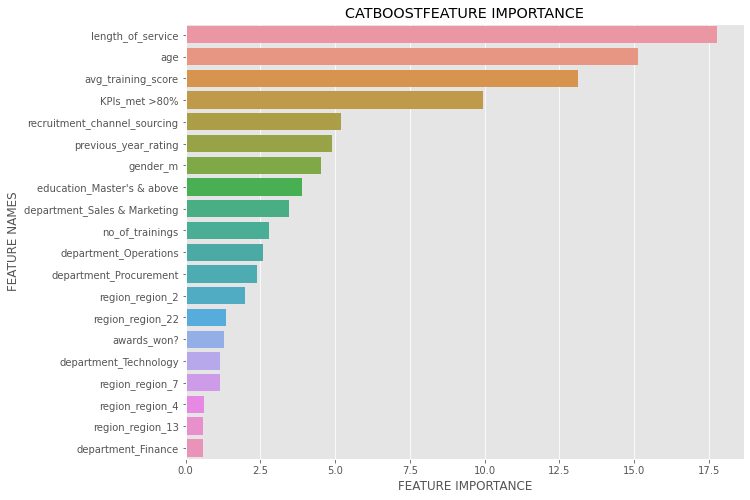

In [ ]:
plot_feature_importance(cat_model.get_feature_importance(),x.columns,'CATBOOST')


In [ ]:
cm = confusion_matrix(y_valid,cat_pred)
print(cm)

[[10151    46]
 [  582  9277]]


In [ ]:
cr = classification_report(y_valid,cat_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     10197
         1.0       1.00      0.94      0.97      9859

    accuracy                           0.97     20056
   macro avg       0.97      0.97      0.97     20056
weighted avg       0.97      0.97      0.97     20056



In [ ]:
cat_model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'Logloss',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.09359899908304214,
 'loss_function': 'Logloss',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 0,
 'subsample': 0.800000011920929,
 'task_

#**Model Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [296]:

grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4,5,6,7,8,9,10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostClassifier()
random_cat = RandomizedSearchCV(final_model,grid,cv=5,verbose=False)
random_cat.fit(x_train,y_train)
                                                   

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6432945	total: 95.9ms	remaining: 1m 35s
1:	learn: 0.6052255	total: 190ms	remaining: 1m 35s
2:	learn: 0.5700643	total: 304ms	remaining: 1m 40s
3:	learn: 0.5436625	total: 397ms	remaining: 1m 38s
4:	learn: 0.5207463	total: 488ms	remaining: 1m 37s
5:	learn: 0.5048539	total: 589ms	remaining: 1m 37s
6:	learn: 0.4882570	total: 687ms	remaining: 1m 37s
7:	learn: 0.4730748	total: 778ms	remaining: 1m 36s
8:	learn: 0.4626710	total: 879ms	remaining: 1m 36s
9:	learn: 0.4524985	total: 970ms	remaining: 1m 36s
10:	learn: 0.4439219	total: 1.06s	remaining: 1m 35s
11:	learn: 0.4323138	total: 1.17s	remaining: 1m 36s
12:	learn: 0.4180959	total: 1.27s	remaining: 1m 36s
13:	learn: 0.4123275	total: 1.38s	remaining: 1m 37s
14:	learn: 0.4070107	total: 1.47s	remaining: 1m 36s
15:	learn: 0.3972144	total: 1.56s	remaining: 1m 36s
16:	learn: 0.3865102	total: 1.66s	remaining: 1m 36s
17:	learn: 0.3805041	total: 1.76s	remaining: 1m 35s
18:	learn: 0.3769085	t

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7ff10eb1f7b8>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': [1000, 6000],
                                        'l2_leaf_reg': [1, 3, 5, 9],
                                        'learning_rate': [0.05, 0.005, 0.0005]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=False)

In [298]:
random_cat.best_estimator_

In [299]:
random_cat.best_score_

0.967615674222159

In [300]:
random_cat.best_params_

{'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.05}

#**Final  Model and submission**

In [303]:
params = {'depth': 8, 
          'iterations': 1000, 
          'l2_leaf_reg': 3, 
          'learning_rate': 0.05}


cat_final=CatBoostClassifier(**params)

final_model_cat = cat_final.fit(x_train,y_train,
                                eval_set=(x_valid,y_valid),
                                plot=True,verbose=False)

catf_pred = final_model_cat.predict(x_valid)
catf_score = f1_score(y_valid,catf_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [304]:
catf_score

0.9676881384198458

In [305]:
catf_test_pred = final_model_cat.predict(x_test)
cat_test = cat_model.predict(x_test)

In [310]:
predictions = [int(round(value)) for value in catf_test_pred]

In [311]:
submission_cat_hyp = pd.DataFrame({'employee_id': emp_id,'is_promoted':predictions})

submission_cat_hyp.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [312]:
filename = 'submission_cat_hyp.csv'
submission_cat_hyp.to_csv(filename, index = False)

print("Saved File : ", filename)

Saved File :  submission_cat.csv


In [313]:
from google.colab import files
files.download('submission_cat_hyp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>